In [1]:
from instanseg import InstanSeg
import matplotlib.pyplot as plt
import tifffile
import numpy as np

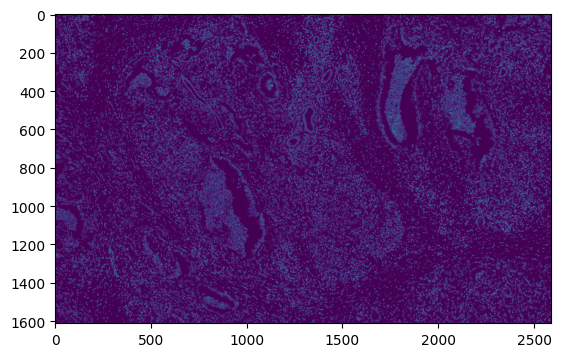

In [2]:
path_to_img = '../../data/raw/imc_data/15T011146-16_Ir191_1.tiff'
img = tifffile.imread(path_to_img)

plt.imshow(img)
plt.show()


Model fluorescence_nuclei_and_cells version 0.1.0 already downloaded in /home/matthieu.bernard/miniconda3/envs/instanseg/lib/python3.9/site-packages/instanseg/utils/../bioimageio_models/, loading
Requesting default device: cpu
Can't instantiate abstract class BioImage with abstract methods scale, standard_metadata, time_interval
Could not read pixel size from image metadata.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.9791666].


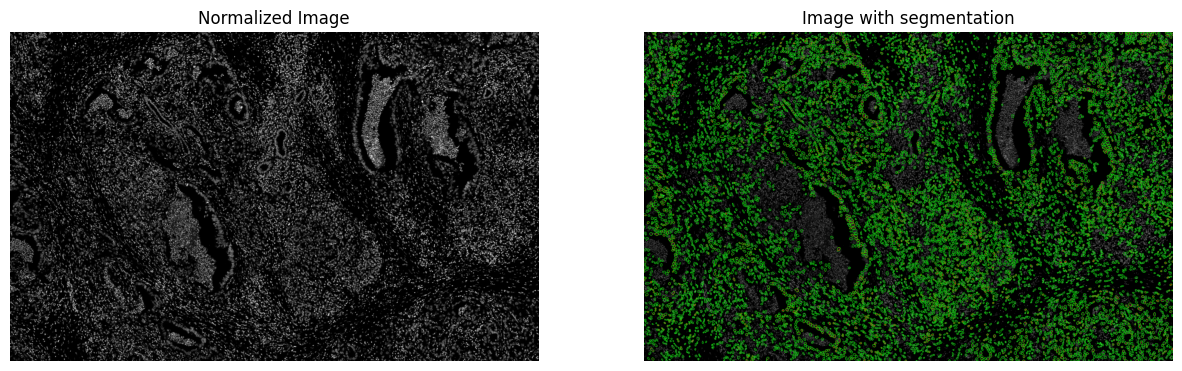

In [15]:

instanseg_brightfield = InstanSeg("fluorescence_nuclei_and_cells", image_reader= "tiffslide", verbosity=1)

image_array, pixel_size = instanseg_brightfield.read_image(path_to_img)

image_array = np.stack([image_array] * 3, axis=-1)

#from instanseg.utils.utils import normalize_image
#image_array = normalize_image(image_array)

labeled_output, image_tensor  = instanseg_brightfield.eval_small_image(image_array, pixel_size,
    min_size=5,               # default is usually 20–50
    instance_threshold=0.6,     # try values from 0.2 to 0.6
    use_watershed=True,
    gaussian_sigma=1.0)

display = instanseg_brightfield.display(image_tensor, labeled_output)

from instanseg.utils.utils import show_images
show_images(image_tensor,display, colorbar=False, titles = ["Normalized Image", "Image with segmentation"])

In [10]:
image_tensor

tensor([[[[0.0347, 0.0000, 0.0139,  ..., 0.0035, 0.0069, 0.0312],
          [0.0486, 0.0035, 0.0035,  ..., 0.0035, 0.0764, 0.0451],
          [0.0521, 0.0069, 0.0035,  ..., 0.0174, 0.1319, 0.1285],
          ...,
          [0.0069, 0.0069, 0.0069,  ..., 0.0104, 0.0035, 0.0035],
          [0.0035, 0.0000, 0.0000,  ..., 0.0139, 0.0069, 0.2535],
          [0.0035, 0.0000, 0.0069,  ..., 0.0625, 0.0174, 0.1736]],

         [[0.0347, 0.0000, 0.0139,  ..., 0.0035, 0.0069, 0.0312],
          [0.0486, 0.0035, 0.0035,  ..., 0.0035, 0.0764, 0.0451],
          [0.0521, 0.0069, 0.0035,  ..., 0.0174, 0.1319, 0.1285],
          ...,
          [0.0069, 0.0069, 0.0069,  ..., 0.0104, 0.0035, 0.0035],
          [0.0035, 0.0000, 0.0000,  ..., 0.0139, 0.0069, 0.2535],
          [0.0035, 0.0000, 0.0069,  ..., 0.0625, 0.0174, 0.1736]],

         [[0.0347, 0.0000, 0.0139,  ..., 0.0035, 0.0069, 0.0312],
          [0.0486, 0.0035, 0.0035,  ..., 0.0035, 0.0764, 0.0451],
          [0.0521, 0.0069, 0.0035,  ..., 0